In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def get_cleaned_data(data, threshold = 0.3):
  log_returns = np.log(data['Close'] / data['Close'].shift(1))
  thresh_count = int(log_returns.shape[0] * threshold)
  return log_returns.dropna(axis=1, thresh=thresh_count).dropna()

In [48]:
def plot_dates(data, start_date, end_date):
  complete_dates = pd.date_range(start=start_date, end=end_date, freq='B')
  missing_dates = complete_dates.difference(data.index)
  print(len(missing_dates), len(complete_dates), len(missing_dates) / len(complete_dates))
  missing_dates_df = pd.DataFrame(index=missing_dates, data={'Missing': 1})
  plt.figure(figsize=(10, 6))
  plt.scatter(missing_dates_df.index, missing_dates_df['Missing'], color='red', s=3)
  plt.title('Dates with Missing Data')
  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.legend()
  plt.grid(True)
  plt.show()

# Stocks

In [3]:
stocks_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    )[0]['Symbol'].tolist()

stocks = yf.download(stocks_tickers, start='1900-01-01', end='2024-02-16')

[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: 1d data not available for startTime=-2208971040 and endTime=1708059600. Only 100 years worth of day granularity data are allowed to be fetched per request.')


In [62]:
clean_stocks = get_cleaned_data(stocks, threshold = 0.3)
clean_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4742 entries, 2005-04-15 to 2024-02-15
Columns: 403 entries, A to ZION
dtypes: float64(403)
memory usage: 14.6 MB


27 784 0.03443877551020408


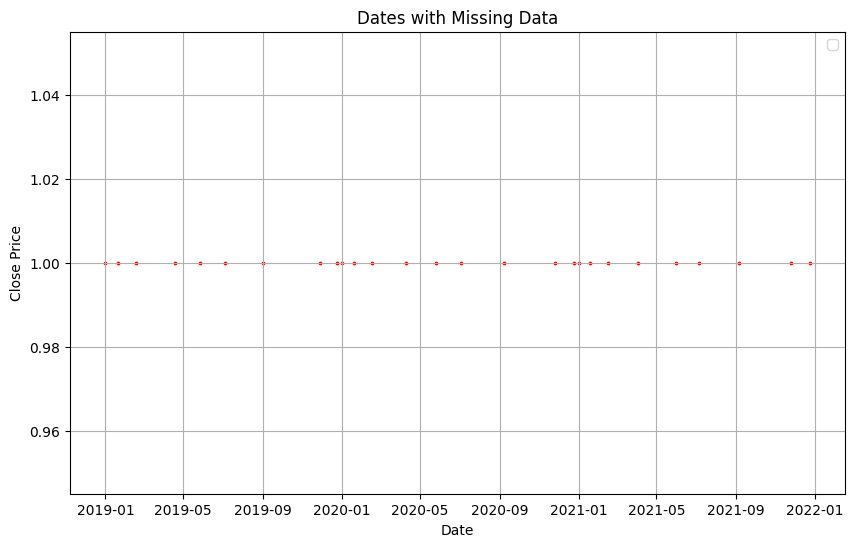

In [63]:
# plot_dates(clean_stocks, clean_stocks.index.min(), clean_stocks.index.max())
plot_dates(clean_stocks, '2019-01-01', '2021-12-31')

So these are same dates every year, and they are not consecutive. So datasets should be fine

# Commodities

In [8]:
commodities_tickers = ['GC=F', 'SI=F', 'CL=F', 'C=F', 'S=F', 'HG=F', 'PL=F',
                       'PA=F', 'NG=F', 'HE=F', 'CC=F', 'CT=F', 'SB=F', 'ALI=F',
                       'NI=F', 'PB=F', 'HG=F', 'SN=F', 'LCO=F', 'OP=F', 'WO=F',
                       'KC=F', 'C=F', 'ZR=F', 'CO=F', 'LIT-USD', 'UX-U21.NYMEX',
                       'HRC=F', 'DC=F', 'MTF=F']
commodities = yf.download(commodities_tickers,
                          start='1900-01-01',
                          end='2022-02-16')

[*********************100%%**********************]  28 of 28 completed
ERROR:yfinance:
10 Failed downloads:
ERROR:yfinance:['NI=F', 'OP=F', 'PB=F', 'WO=F', 'SN=F', 'CO=F', 'LCO=F', 'UX-U21.NYMEX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['C=F', 'S=F']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1900-01-01 -> 2022-02-16)')


In [58]:
clean_commodities = get_cleaned_data(commodities, threshold = 1)
clean_commodities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5899 entries, 2000-01-03 to 2022-02-15
Empty DataFrame


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


3 784 0.003826530612244898


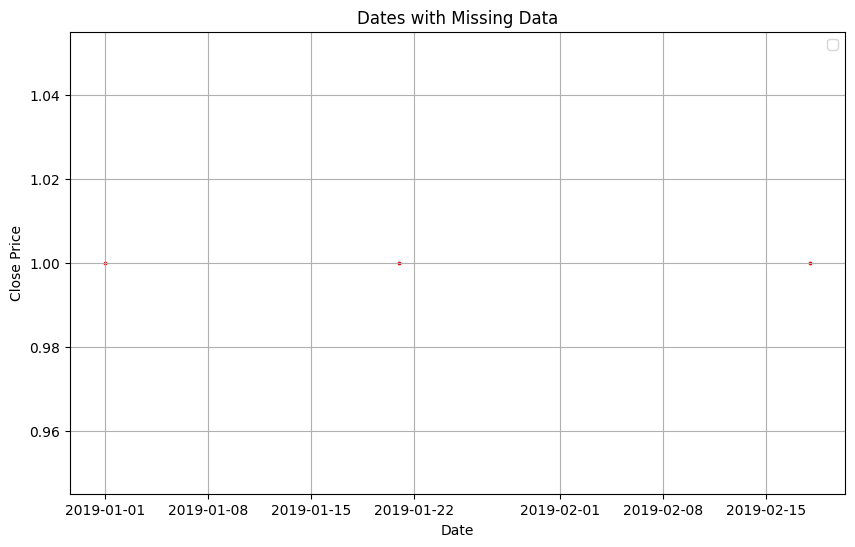

In [64]:
# plot_dates(clean_commodities, clean_commodities.index.min(), clean_commodities.index.max())
plot_dates(clean_commodities, '2019-01-01', '2021-12-31')

# Cryptos

In [10]:
cryptos_tickers = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'XRP-USD',
                   'ADA-USD', 'SOL-USD', 'AVAX-USD', 'DOGE-USD', 'LUNA1-USD',
                   'DOT-USD', 'SHIB-USD', 'LINK-USD', 'CRO-USD', 'LTC-USD',
                   'ALGO-USD', 'WBTC-USD', 'MATIC-USD', 'ICP-USD', 'ATOM1-USD',
                   'VET-USD', 'FIL-USD', 'TRX-USD', 'THETA-USD', 'XLM-USD',
                   'FTT-USD', 'UST-USD', 'HBAR-USD', 'XTZ-USD']
cryptos = yf.download(cryptos_tickers, start='1900-01-01', end='2022-02-16')

[*********************100%%**********************]  29 of 29 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATOM1-USD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1900-01-01 -> 2022-02-16)')


In [66]:
clean_cryptos = get_cleaned_data(cryptos, threshold = 1)
clean_cryptos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2709 entries, 2014-09-17 to 2022-02-15
Empty DataFrame


0 1935 0.0


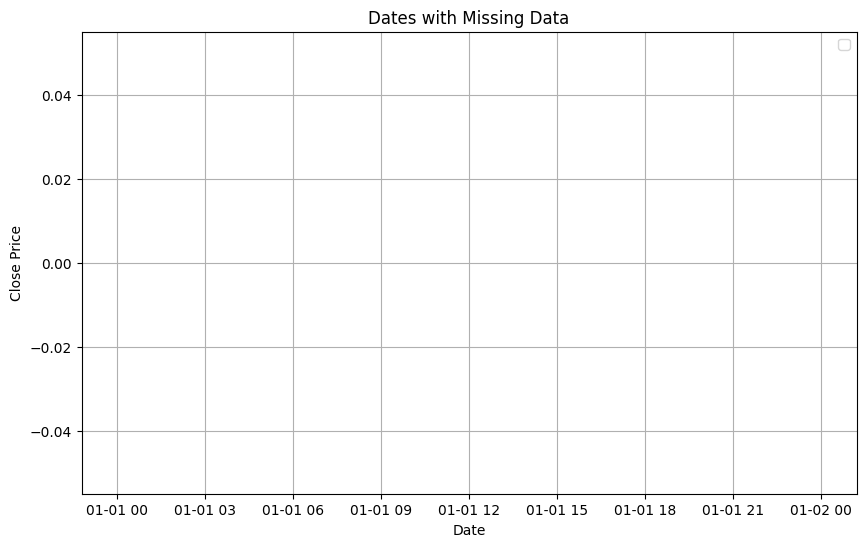

In [68]:
plot_dates(clean_cryptos, clean_cryptos.index.min(), clean_cryptos.index.max())
# plot_dates(clean_cryptos, '2019-01-01', '2021-12-31')

# Save to CSV

In [69]:
clean_stocks.to_csv('stocks.csv')
clean_commodities.to_csv('commodities.csv')
clean_cryptos.to_csv('cryptos.csv')